# Import Library and Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/Churn_Modelling.csv')

## Clean and prepare Dataset

In [6]:
print(df.isnull().sum())


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Encode Categorical Columns

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


# Split Data into X and y

In [9]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target


# Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train a Classification Model


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.866
Confusion Matrix:
 [[1552   55]
 [ 213  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



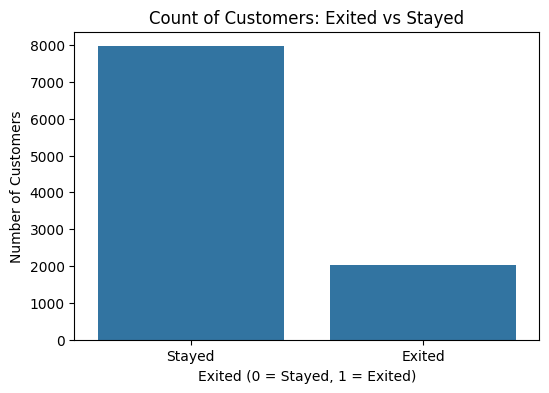

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers who exited (1) vs stayed (0)
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)

plt.title('Count of Customers: Exited vs Stayed')
plt.xlabel('Exited (0 = Stayed, 1 = Exited)')
plt.ylabel('Number of Customers')
plt.xticks([0,1], ['Stayed', 'Exited'])
plt.show()
